## 데이터 전처리
### 자료형 변환

In [1]:
import numpy as np
import pandas as pd

In [14]:
#이미지나 그래프에 한글 출력을 위한 설정
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Darwin' :
    rc('font', family = 'AppleGothic')
elif platform.system() == 'Windows' :
    font_name = font_manager.FontProperties(
        fname = 'c:/Windows/Fonts/malgun.ttf').get_name()
    rc('font', family = font_name)
    
#음수 출력 설정
import matplotlib
matplotlib.rcParams['axes.unicode_minus'] = False
    


In [3]:
# 데이터 불러오기 
mpg = pd.read_csv('./data/auto-mpg.csv', header= None)
mpg.columns=['mpg','cylinders','displacement','horsepower','weight','acceleration',
             'model year','origin','name']
# print(mpg.head())
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [6]:
#horsepower 를 숫자 자료형으로 변경
print(mpg['horsepower'].unique()) # ?가 포함
#이 방법은 데이터가 아주 많거나 데이터의 종류가 연속형 형태면 쉽지 않습니다.

#데이터가 많을 때는 일단 형변환을 해보자!
# mpg['horsepower'] = mpg['horsepower'].astype('float') # 이러면 ? 가 문제가 되었다는 걸 찾게 됨

# ? 를 NaN으로 치환
mpg['horsepower'].replace('?', np.nan, inplace = True)

# NaN을 drop
mpg.dropna(subset =['horsepower'], axis = 0, inplace = True) #horsepower에서만 nan을 제거

# 자료형 변환
mpg['horsepower'] = mpg['horsepower'].astype('float')

mpg.info()

['130.0' '165.0' '150.0' '140.0' '198.0' '220.0' '215.0' '225.0' '190.0'
 '170.0' '160.0' '95.00' '97.00' '85.00' '88.00' '46.00' '87.00' '90.00'
 '113.0' '200.0' '210.0' '193.0' '?' '100.0' '105.0' '175.0' '153.0'
 '180.0' '110.0' '72.00' '86.00' '70.00' '76.00' '65.00' '69.00' '60.00'
 '80.00' '54.00' '208.0' '155.0' '112.0' '92.00' '145.0' '137.0' '158.0'
 '167.0' '94.00' '107.0' '230.0' '49.00' '75.00' '91.00' '122.0' '67.00'
 '83.00' '78.00' '52.00' '61.00' '93.00' '148.0' '129.0' '96.00' '71.00'
 '98.00' '115.0' '53.00' '81.00' '79.00' '120.0' '152.0' '102.0' '108.0'
 '68.00' '58.00' '149.0' '89.00' '63.00' '48.00' '66.00' '139.0' '103.0'
 '125.0' '133.0' '138.0' '135.0' '142.0' '77.00' '62.00' '132.0' '84.00'
 '64.00' '74.00' '116.0' '82.00']
<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinde

In [7]:
#origin 의 데이터를 1 → USA ,2 → EU, 3 → JAPAN으로 치환하기
mpg['origin'].replace({1: 'USE', 2 : 'EU', 3 :'JAPAN'}, inplace = True)
print(mpg['origin'].unique())
print(mpg['origin'].head())

['USE' 'JAPAN' 'EU']
0    USE
1    USE
2    USE
3    USE
4    USE
Name: origin, dtype: object


In [8]:
#model year 컬럼의 값을 범주형(category - 특정 값만을 가져야하는 자료형)으로 치환
# 문자열이나 숫자 자료형은 원핫 인코딩이 안되는 경우가 발생할 수 있음
mpg['model year'] = mpg['model year'].astype('category')
print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   mpg           392 non-null    float64 
 1   cylinders     392 non-null    int64   
 2   displacement  392 non-null    float64 
 3   horsepower    392 non-null    float64 
 4   weight        392 non-null    float64 
 5   acceleration  392 non-null    float64 
 6   model year    392 non-null    category
 7   origin        392 non-null    object  
 8   name          392 non-null    object  
dtypes: category(1), float64(5), int64(1), object(2)
memory usage: 28.6+ KB
None


## Standardization (표준화)
### 표준 값과 편차 값

<Axes: >

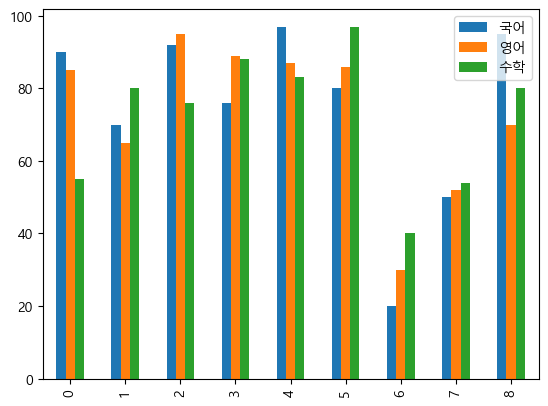

In [18]:
#student.csv 파일 읽기
students = pd.read_csv('./data/student.csv', encoding = 'cp949')
# print(students)
#막대 그래프 그리기
#별다른 설정없이 그리면 한글이 출력되지 않음
students.plot(kind = 'bar')


In [22]:
#표준 값과 편차값 구하기
kormean, korstd = students['국어'].mean(), students['국어'].std()
engmean, engstd = students['영어'].mean(), students['영어'].std()
matmean, matstd = students['수학'].mean(), students['수학'].std()

students['국어표준값'] = (students['국어']- kormean) / korstd
students['영어표준값'] = (students['영어']- engmean) / engstd
students['수학표준값'] = (students['수학']- matmean) / matstd

students['국어편차값'] = (students['국어표준값'] * 10) + 50
students['영어편차값'] = (students['영어표준값'] * 10) + 50
students['수학편차값'] = (students['수학표준값'] * 10) + 50

print(students)

    이름  국어  영어  수학     국어표준값     영어표준값     수학표준값      국어편차값      영어편차값  \
0  박지영  90  85  55  0.616320  0.554321 -0.941716  56.163201  55.543208   
1  김태함  70  65  80 -0.176091 -0.386979  0.399335  48.239085  46.130213   
2  김효섭  92  95  76  0.695561  1.024971  0.184767  56.955613  60.249706   
3  임경희  76  89  88  0.061632  0.742581  0.828471  50.616320  57.425807   
4  권혁진  97  87  83  0.893664  0.648451  0.560261  58.936642  56.484508   
5  하혜진  80  86  97  0.220114  0.601386  1.311250  52.201143  56.013858   
6  이준원  20  30  40 -2.157120 -2.034253 -1.746346  28.428796  29.657471   
7  윤정웅  50  52  54 -0.968503 -0.998823 -0.995358  40.314970  40.011766   
8  주시현  95  70  80  0.814423 -0.151654  0.399335  58.144230  48.483462   

       수학편차값  
0  40.582843  
1  53.993351  
2  51.847670  
3  58.284714  
4  55.602612  
5  63.112497  
6  32.536538  
7  40.046423  
8  53.993351  


<Axes: >

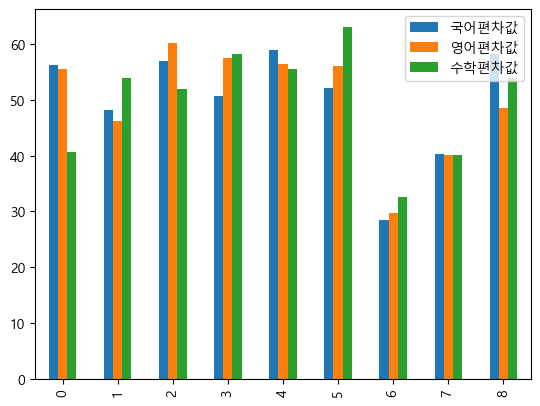

In [23]:
students[['국어편차값','영어편차값','수학편차값']].plot(kind = 'bar')

### scikit-learn을 이용한 표준화

In [25]:
from sklearn import preprocessing


In [26]:
#scikit-learn은 머신러닝을 위한 패키지라서 numpy 배열을 가지고 작업을 수행
x = mpg[['horsepower']].values

print('표준화 전의 기술 통계')
print('평균:' , np.mean(x))
print('표준 편차:' , np.std(x))
print('최대:' , np.max(x))
print('최소:' , np.min(x))

표준화 전의 기술 통계
평균: 104.46938775510205
표준 편차: 38.44203271442593
최대: 230.0
최소: 46.0


In [27]:
# 평균이 0이고 표편이 1로 만드는 스케일러
scaler = preprocessing.StandardScaler()

scaler.fit(x) # 표준화 작업 전
x_scaled  = scaler.transform(x) # 얘가 표준화 실행

# dir(scaler)
# x_scaled = scaler.fit_transform(x) # 두 가지 방법을 한번에

print('평균 0 , 표편 1인 표준화 작업 후의 기술 통계')
print('평균:' , np.mean(x_scaled))
print('표준 편차:' , np.std(x_scaled))
print('최대:' , np.max(x_scaled))
print('최소:' , np.min(x_scaled))

평균 0 , 표편 1인 표준화 작업 후의 기술 통계
평균: -1.812609019796174e-16
표준 편차: 0.9999999999999998
최대: 3.2654519904664348
최소: -1.5209754434541274


In [28]:
# 이상치가 많은 경우의 스케일러
scaler = preprocessing.RobustScaler()

scaler.fit(x)
x_scaled  = scaler.transform(x)

print('이상치가 많은 경우의 표준화 작업 후의 기술 통계')
print('평균:' , np.mean(x_scaled))
print('표준 편차:' , np.std(x_scaled))
print('최대:' , np.max(x_scaled))
print('최소:' , np.min(x_scaled))

이상치가 많은 경우의 표준화 작업 후의 기술 통계
평균: 0.2150860344137655
표준 편차: 0.7537653473416848
최대: 2.676470588235294
최소: -0.9313725490196079


### scikit-learn을 이용한 정규화

In [37]:
from sklearn.preprocessing import Normalizer

featuers = np.array([[1, 2], [3, 4], [5, 6]])

#정규화 객체를 생성
#l1은 행 데이터의 합을 가지고 각 데이터를 나눈 값 : 다 더하면 1
#ㅣ2은 각 데이터를 각 데이터를 제곱해서 더한 값의 제곱근으로 나눈 값
normalizer_l1 = Normalizer(norm = 'l1')
normalizer_l2 = Normalizer(norm = 'l2')


result_l1 = normalizer_l1.transform(featuers)
result_l2 = normalizer_l2.transform(featuers)

print(result_l1)
print(result_l2)

[[0.33333333 0.66666667]
 [0.42857143 0.57142857]
 [0.45454545 0.54545455]]
[[0.4472136  0.89442719]
 [0.6        0.8       ]
 [0.6401844  0.76822128]]


### 다항 및 교차항 특성 만들기

In [40]:
from sklearn.preprocessing import PolynomialFeatures

features = np.array([[2,3 ], [3, 4],[1, 5]])

#다항 및 교차항을 생성해주는 객체를 생성
ploynomial_interaction = PolynomialFeatures(degree = 2, include_bias = False)
result = ploynomial_interaction.fit_transform(features)
print(result)

ploynomial_interaction = PolynomialFeatures(degree = 2, include_bias = True,
                                           interaction_only = True)
result = ploynomial_interaction.fit_transform(features)
print(result)

[[ 2.  3.  4.  6.  9.]
 [ 3.  4.  9. 12. 16.]
 [ 1.  5.  1.  5. 25.]]
[[ 1.  2.  3.  6.]
 [ 1.  3.  4. 12.]
 [ 1.  1.  5.  5.]]


## 특성 변환

In [43]:
# 함수를 적용해서 데이터를 변경하는 것
from sklearn.preprocessing import FunctionTransformer

features = np.array([[1, 3],[3, 6]])

#적용할 함수
def add_one(x:int) -> int:
    return x + 1

one_transformer = FunctionTransformer(add_one)
result = one_transformer.transform(features)
print(result)

df = pd.DataFrame(features, columns=['f1', 'f2'])
print(df.apply(add_one))

[[2 4]
 [4 7]]
   f1  f2
0   2   4
1   4   7


### 이산화(범주화)

In [44]:
#연속형 데이터를 간격단위로 분할해서 값을 할당하는 작업을 이산화

#구간 생성
#3개의 구간으로 분할
#최소값 부터 최대값까지 3개로 분할하고 데이터의 개수와 경계값을 리턴해줍니다.
count, bin_dividers = np.histogram(mpg['horsepower'], bins = 3)
print(count)
print(bin_dividers)

[257 103  32]
[ 46.         107.33333333 168.66666667 230.        ]


In [47]:
# 각 그룹에 할당할 데이터를 생성
bin_names = ['저출력', '보통출력', '고출력']

# 이산화
# x는 분할할 데이터, bins는 구간의 경계값 리스트, lables는 구간에 할당할 데이터 목록
#include_lowest 는 첫 경계값 포함 여부
mpg['hp_bin'] = pd.cut(x = mpg['horsepower'], bins = bin_dividers,
                      labels = bin_names, include_lowest = True)
print(mpg[['horsepower', 'hp_bin']].head(20))

    horsepower hp_bin
0        130.0   보통출력
1        165.0   보통출력
2        150.0   보통출력
3        150.0   보통출력
4        140.0   보통출력
5        198.0    고출력
6        220.0    고출력
7        215.0    고출력
8        225.0    고출력
9        190.0    고출력
10       170.0    고출력
11       160.0   보통출력
12       150.0   보통출력
13       225.0    고출력
14        95.0    저출력
15        95.0    저출력
16        97.0    저출력
17        85.0    저출력
18        88.0    저출력
19        46.0    저출력


### numpy 의 digitize를 이용한 구간 분할

In [48]:
age = np.array([[13],[30],[57],[54],[25],[31]])
#pandas의 매서드들은 DataFrame 이나 Series를 이용해서 작업
#머신러닝관련한 메서드들을 2차원 이상의 ndarray를 가지고 작업을 진행함

#30이 안되면 0, 30이상이면 1로 변환
#bins에는 여러개의 데이터 설정이 가능
result =np.digitize(age, bins = [30])
print(result)

[[0]
 [1]
 [1]
 [1]
 [0]
 [1]]


## Binarizer를 이용한 구간 분할

In [50]:
from sklearn.preprocessing import Binarizer

#threshold(임계값)
#흑백 이미지 데이터에서 뚜력한 구분하기 위해서 임계값을 설정해서
#임계값 아래 와 위를 구분합니다.
binarizer = Binarizer(threshold = 30.0)
print(binarizer.transform(age))

[[0]
 [0]
 [1]
 [1]
 [0]
 [1]]


## KBinsDiscretizer를 이용한 구간 분할

In [52]:
from sklearn.preprocessing import KBinsDiscretizer

#균등한 분포로 4분할
#ordinal : 라벨 인코딩 - 일련번호
kb = KBinsDiscretizer(4, encode='ordinal', strategy = 'quantile')
print(kb.fit_transform(age))

#onehot 인코딩 - 희소 행렬
kb = KBinsDiscretizer(4, encode='onehot', strategy = 'quantile')
print(kb.fit_transform(age))

#onehot 인코딩 - 밀집 행렬로 표현
kb = KBinsDiscretizer(4, encode='onehot-dense', strategy = 'quantile')
print(kb.fit_transform(age))

[[0.]
 [1.]
 [3.]
 [3.]
 [0.]
 [2.]]
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 3)	1.0
  (3, 3)	1.0
  (4, 0)	1.0
  (5, 2)	1.0
[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


## KMeans 알고리즘을 이용한 군집의 결과를 컬럼으로 추가

In [57]:
from sklearn.cluster import KMeans

#샘플 데이터 - DataFrame 에서 추출하는 것이 일반적
sample = np.array([[13, 30],[20, 30],[25, 27], [23, 29],[26, 28]])

dataframe = pd.DataFrame(sample, columns =['f1', 'f2'])

clustering = KMeans(3, random_state = 42)
clustering.fit(sample)
dataframe['group'] = clustering.predict(sample)
print(dataframe)

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\USER\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


   f1  f2  group
0  13  30      1
1  20  30      2
2  25  27      0
3  23  29      2
4  26  28      0


## 이상치 탐지

### 직접 수식을 작성해서 탐지

In [73]:
# 이상치 탐지를 위한 데이터 생성
features = np.array([[10000,10, 7, 6, 4, 2, 5, 3],
                     [20000, 3, 5, 1, 6, 4, 7, 9]])

In [63]:
#z-score을 이용해서 이상치를 탐지해주는 함수
def outliers_z_score(ys) :
    #임계값 설정
    threshold = 3
    
    #평균 구하기
    mean_y = np.mean(ys)
    #표준편자 구하기
    std_y = np.std(ys)
    
    #z-score 구하기
    z_scores = [(y - mean_y) / std_y for y in ys]
    
    print("z-score:", z_scores)
    return np.where(np.abs(z_scores) > threshold)

print(outliers_z_score(features))

z-score: [array([-0.2572622 , -0.2572622 , -0.25788204, -0.25808866, -0.25850189,
       -0.25891512, -0.25829527, -0.2587085 ]), array([ 3.87298279, -0.2587085 , -0.25829527, -0.25912174, -0.25808866,
       -0.25850189, -0.25788204, -0.25746881])]
(array([1], dtype=int64), array([0], dtype=int64))


In [74]:
#z-score을 이용해서 이상치를 탐지해주는 함수 -보정해서 사용하는 방법
def outliers_mod_z_score(ys) :
    #임계값 설정
    threshold = 3.5
    
    #중앙값 구하기
    median_y = np.median(ys)
    
    #중위 절대 편차
    median_absolute_deviation_y = np.median([np.abs(y - median_y) for y in ys])
    
    #중위 절대 편차를 가지고 z-score 계산 후 0.6745를 곱함
    modified_z_scores = [0.6745 * (y - median_y) / median_absolute_deviation_y for y in ys]
    print("modified_z-score:", modified_z_scores)
    return np.where(np.abs(modified_z_scores) > threshold)

print(outliers_mod_z_score(features))

modified_z-score: [array([ 1.49761483e+03,  2.24833333e-01, -2.24833333e-01]), array([ 2.99650372e+03, -8.24388889e-01, -5.24611111e-01])]
(array([0, 1], dtype=int64), array([0, 0], dtype=int64))


In [79]:
# IQR 을 이용하는 방법
# boxplot을 그렸을 때 수염의 바깥쪽에 있는 데이터를 이상치로 간주

def outliers_iqr(ys) :
    #iqr 구하기
    quartile_1, quartile_3 = np.percentile(ys, [25,75])
    iqr = quartile_3 - quartile_1
    
    #하한 과 상한 구하기
    lower_bound = quartile_1 - (iqr * 1.5) 
    upper_bound = quartile_3 + (iqr * 1.5)
    
    print(lower_bound)
    print(upper_bound)
        
    return np.where((ys > upper_bound) | (ys < lower_bound))

print(outliers_iqr(features))

#이렇게 응용가능!
print(outliers_iqr(mpg['horsepower'].values))

-11240.0
18748.0
(array([1], dtype=int64), array([0], dtype=int64))
-1.5
202.5
(array([  6,   7,   8,  13,  25,  27,  66,  93,  94, 115], dtype=int64),)


In [83]:
#데이터를 생성해주는 API
from sklearn.datasets import make_blobs

#일정한 비율을 이상치로 간주하는 API
from sklearn.covariance import EllipticEnvelope

#2행 10행의 데이터를 랜덤하게 생성
# _는 데이터를 사용하지 않음
features, _ = make_blobs(n_samples = 10, n_features =2 , centers = 1, random_state = 42)

#이상치 생성 - 0번 데이터는 이상한 데이터
features[0, 0] = 10000
features[0, 1] = 1000

print(features)
#이상치 탐지 객체
outlier_detector = EllipticEnvelope(contamination = 0.2) # 이걸로 이상치 비율 설정
outlier_detector.fit(features)
#-1이면 이상치, 1이면 정상적인 데이터
outlier_detector.predict(features)

[[ 1.00000000e+04  1.00000000e+03]
 [-3.41722170e+00  7.60198243e+00]
 [-3.52202874e+00  9.32853346e+00]
 [-2.26723535e+00  7.10100588e+00]
 [-2.97261532e+00  8.54855637e+00]
 [-1.04354885e+00  8.78850983e+00]
 [-1.86150908e+00  1.05373160e+01]
 [-2.97867201e+00  9.55684617e+00]
 [-4.23411546e+00  8.45199860e+00]
 [-9.29984808e-01  9.78172086e+00]]


array([-1,  1,  1, -1,  1,  1,  1,  1,  1,  1])

## 추가 설명

In [86]:
L = list(range(10))

#L의 모든 데이터를 순회하면서 각 데이터의 제곱을 한 값을 가지고 새로운 list 생성
#이전 방법
r = []
for i in L :
    r.append(i**2)
print(r)

r = list(map(lambda x : x**2, L))
print(r)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]
[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [87]:
#List Comprehension 이용
r = [i ** 2 for i in L]
print(r)

[0, 1, 4, 9, 16, 25, 36, 49, 64, 81]


In [88]:
#필터링 - L의 모든 데이터를 i에 순차적으로 대입해서 뒤의 조건문이 참인 경우만 list로 생성
r = [i for i in L if i % 2 ==0]
print(r)

[0, 2, 4, 6, 8]


In [89]:
#이중 for문....와 짱 대박이당...0.0
li1 = [1, 2, 3]
li2 = [4, 5, 6]
r = [x*y for x in li1 for y in li2]
print(r)

[4, 5, 6, 8, 10, 12, 12, 15, 18]
